In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.impute import SimpleImputer

import warnings
warnings.simplefilter("ignore")

In [2]:
dates_train = ['ticket_issued_date', 'hearing_date', 'payment_date']
dates_test = ['ticket_issued_date', 'hearing_date']
train = pd.read_csv("../Тестовые задания/train_2.csv", index_col = 0, parse_dates = [i for i in dates_train])
test =  pd.read_csv("../Тестовые задания/test_2.csv", index_col = 0, parse_dates = [i for i in dates_test])

# EDA

In [3]:
print(train.shape, test.shape)
rows = train.shape[0] + test.shape[0]
print(train.shape[0] / rows, test.shape[0] / rows)
print()

(225000, 34) (25305, 27)
0.8989033379277281 0.10109666207227183



In [4]:
train.head()

,ticket_id,agency_name,inspector_name,violator_name,violation_street_number,violation_street_name,violation_zip_code,mailing_address_str_number,mailing_address_str_name,city,...,clean_up_cost,judgment_amount,payment_amount,balance_due,payment_date,payment_status,collection_status,grafitti_status,compliance_detail,compliance
0,22056,"Buildings, Safety Engineering & Env Department","Sims, Martinzie","INVESTMENT INC., MIDWEST MORTGAGE",2900.0,TYLER,NaN,3.0,S. WICKER,CHICAGO,...,0.0,305.0,0.0,305.0,NaT,NO PAYMENT APPLIED,NaN,NaN,non-compliant by no payment,0.0
1,27586,"Buildings, Safety Engineering & Env Department","Williams, Darrin","Michigan, Covenant House",4311.0,CENTRAL,NaN,2959.0,Martin Luther King,Detroit,...,0.0,855.0,780.0,75.0,2005-06-02,PAID IN FULL,NaN,NaN,compliant by late payment within 1 month,1.0
2,22062,"Buildings, Safety Engineering & Env Department","Sims, Martinzie","SANDERS, DERRON",1449.0,LONGFELLOW,NaN,23658.0,P.O. BOX,DETROIT,...,0.0,0.0,0.0,0.0,NaT,NO PAYMENT APPLIED,NaN,NaN,not responsible by disposition,NaN
3,22084,"Buildings, Safety Engineering & Env Department","Sims, Martinzie","MOROSI, MIKE",1441.0,LONGFELLOW,NaN,5.0,ST. CLAIR,DETROIT,...,0.0,0.0,0.0,0.0,NaT,NO PAYMENT APPLIED,NaN,NaN,not responsible by disposition,NaN
4,22093,"Buildings, Safety Engineering & Env Department","Sims, Martinzie","NATHANIEL, NEAL",2449.0,CHURCHILL,NaN,7449.0,CHURCHILL,DETROIT,...,0.0,0.0,0.0,0.0,NaT,NO PAYMENT APPLIED,NaN,NaN,not responsible by disposition,NaN


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 225000 entries, 0 to 224999
Data columns (total 34 columns):
ticket_id                     225000 non-null int64
agency_name                   225000 non-null object
inspector_name                225000 non-null object
violator_name                 224969 non-null object
violation_street_number       225000 non-null float64
violation_street_name         225000 non-null object
violation_zip_code            0 non-null float64
mailing_address_str_number    222105 non-null float64
mailing_address_str_name      224996 non-null object
city                          225000 non-null object
state                         224979 non-null object
zip_code                      224999 non-null object
non_us_str_code               1 non-null object
country                       225000 non-null object
ticket_issued_date            225000 non-null datetime64[ns]
hearing_date                  214104 non-null datetime64[ns]
violation_code                225

In [6]:
train.dtypes.value_counts()

object            16
float64           14
datetime64[ns]     3
int64              1
dtype: int64

In [7]:
train['violation_code'].value_counts()

9-1-36(a)               92469
9-1-81(a)               41330
22-2-88                 28720
9-1-104                 18092
22-2-45                  5208
9-1-105                  4860
9-1-43(a) - (Dwellin     4252
9-1-110(a)               3994
22-2-22                  3755
9-1-103(C)               3278
19450901                 2947
22-2-43                  2744
22-2-88(b)               2253
22-2-17                  1940
22-2-83(a)(b)(c)          849
61-81.0100/32.0066        811
22-2-83                   633
9-1-43(a) - (Structu      598
9-1-206                   334
9-1-209                   310
22-2-21(b)                261
22-2-61                   259
61-5-21                   257
9-1-101                   247
9-1-107                   205
9-1-43(a) - (Stories      171
9-1-111                   169
20130901                  167
22-2-88(a)                165
9-1-201(a)                165
                        ...  
61-116.0100/32.0031         1
9-1-375                     1
61-120.010

In [8]:
train['violation_description'].value_counts()

Failure of owner to obtain certificate of compliance                                                                                                                                                                               92469
Failure to obtain certificate of registration for rental property                                                                                                                                                                  41330
Failure of owner to keep property, its sidewalks, or adjoining public property free from solid waste                                                                                                                               28719
Excessive weeds or plant growth one- or two-family dwelling or commercial Building                                                                                                                                                 18092
Violation of time limit for approved containers to remain at curbsid

In [9]:
train['disposition'].value_counts()

Responsible by Default                124354
Not responsible by Dismissal           43454
Not responsible by City Dismissal      30106
Responsible by Admission               12861
Responsible by Determination            7244
Not responsible by Determination        6348
PENDING JUDGMENT                         294
SET-ASIDE (PENDING JUDGMENT)             270
Responsible (Fine Waived) by Deter        69
Name: disposition, dtype: int64

In [10]:
train['judgment_amount'].value_counts()

0.0        80541
305.0      74737
85.0       14484
140.0      11928
250.0       9535
280.0       6931
580.0       4590
3880.0      3785
360.0       3674
1130.0      3576
130.0       2852
80.0        2398
2780.0      1409
57.5        1173
230.0       1115
167.5        570
530.0        326
11030.0      195
1680.0       184
855.0        147
1030.0       144
55.0         139
330.0         87
5530.0        85
415.0         82
3530.0        74
155.0         66
1350.0        40
2530.0        39
470.0         26
7730.0        13
1530.0        12
690.0         10
780.0         10
2230.0         4
1955.0         2
134.5          2
206.0          2
1405.0         2
380.0          1
8830.0         1
300.0          1
217.0          1
195.0          1
525.0          1
430.0          1
3330.0         1
2994.5         1
750.5          1
1097.0         1
Name: judgment_amount, dtype: int64

### Additional fields

In [11]:
train.groupby(['collection_status'])['compliance'].value_counts()

collection_status  compliance
IN COLLECTION      0.0           32629
                   1.0             115
Name: compliance, dtype: int64

### Exploring the main fields of dataset

In [12]:
train_paid = train[train['compliance'] == 1]
train_not_paid = train[train['compliance'] == 0]
train_paid.shape, train_not_paid.shape

((10487, 34), (134041, 34))

In [13]:
duration = (train_not_paid['ticket_issued_date'] - train_not_paid['payment_date']).value_counts()
duration.head()

-35 days +11:00:00    27
-14 days +11:00:00    25
-27 days +11:00:00    23
-35 days +09:00:00    22
-20 days +11:00:00    20
dtype: int64

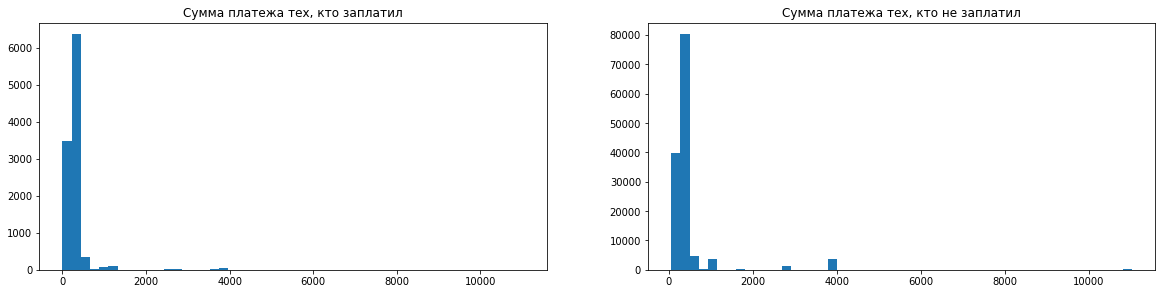

In [14]:
# Гипотеза о том, что у неплателищиков накопились непосильные платежи, неверна. Суммы налогов у обеих групп 
# распределены почти одинково. Большая часть налогов не превышает 500 платежных едининц
plt.figure(figsize=(20,10))
plt.subplot(2,2,1)
plt.hist(train_paid['judgment_amount'],50);
plt.title('Сумма платежа тех, кто заплатил');
plt.subplot(2,2,2)
plt.hist(train_not_paid['judgment_amount'],50);
plt.title('Сумма платежа тех, кто не заплатил');

In [15]:
train['city'].value_counts().head()

DETROIT       124717
SOUTHFIELD     12563
Detroit         9394
detroit         3681
DEARBORN        3204
Name: city, dtype: int64

In [16]:
train['state'].value_counts().head()

MI    206415
CA      4346
TX      2076
FL      1918
IL      1177
Name: state, dtype: int64

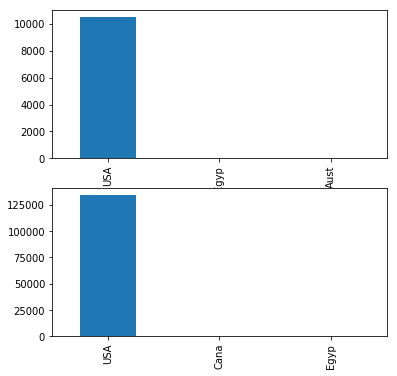

In [17]:
# Также гипотеза о том, что плательщики и неплательщики как-то связаны с городом, страной проживания и штатом, не подтвердилась
plt.figure(figsize = (6, 6))
plt.subplot(2,1,1)
train_paid['country'].value_counts().head(10).plot(kind = 'bar', sort_columns = False, )
plt.subplot(2,1,2)
train_not_paid['country'].value_counts().head(10).plot(kind = 'bar', sort_columns = False, )

In [51]:
train_num = (train.select_dtypes('float64'))

In [52]:
train_num.drop(columns=['violation_zip_code', 'grafitti_status'], axis = 1, inplace = True)
train_num_paid = train_num[train_num['compliance'] == 1]
train_num_paid.head()

,violation_street_number,mailing_address_str_number,fine_amount,admin_fee,state_fee,late_fee,discount_amount,clean_up_cost,judgment_amount,payment_amount,balance_due,compliance
1,4311.0,2959.0,750.0,20.0,10.0,75.0,0.0,0.0,855.0,780.0,75.0,1.0
18,14715.0,14715.0,100.0,20.0,10.0,10.0,0.0,0.0,140.0,130.0,10.0,1.0
19,14715.0,141715.0,100.0,20.0,10.0,10.0,0.0,0.0,140.0,130.0,10.0,1.0
37,15439.0,15439.0,250.0,20.0,10.0,25.0,0.0,0.0,305.0,280.0,25.0,1.0
41,2900.0,29.0,250.0,20.0,10.0,0.0,25.0,0.0,280.0,255.0,0.0,1.0


In [64]:
# как видно корреляция численных столбцов с целевой переменной недостаточно высока, но все же есть. Наиболее сильно она 
# проявляется у переменных payment_amount, discount_amount и balance_due. Если бы данные как в train выборке, так и в test
# выборке содержали данные об оплате штрафов (налогов) за каждый месяц (например, в виде транзакций), либо хотя бы за пол-года
# + остаточная сумма в каждом месяце, возможно это бы повлияло на результат целевой переменной.
train_num.dropna().corr()['compliance'].dropna().sort_values()

balance_due                  -0.127687
late_fee                     -0.082698
judgment_amount              -0.048786
fine_amount                  -0.045255
mailing_address_str_number   -0.009663
violation_street_number      -0.002502
discount_amount               0.162697
payment_amount                0.212672
compliance                    1.000000
Name: compliance, dtype: float64

### Imputation of missing values

In [25]:
def missing_values(file):
    sum_miss_val = file.isnull().sum()
    percent_miss_val = sum_miss_val * 100 / len(file)
    miss_val_table = pd.concat([sum_miss_val, percent_miss_val], axis = 1)
    miss_val_table = miss_val_table.rename(columns = {0 : 'Missing values', 
                                                      1 : '% of Total values'})
    miss_val_table = miss_val_table[miss_val_table.iloc[:,1] != 0].sort_values(
        '% of Total values', ascending=False).round(1)
    return miss_val_table

In [8]:
missing_values(train)

,Missing values,% of Total values
violation_zip_code,225000,100.0
grafitti_status,225000,100.0
non_us_str_code,224999,100.0
collection_status,192256,85.4
payment_date,186862,83.0
compliance,80472,35.8
hearing_date,10896,4.8
mailing_address_str_number,2895,1.3
violator_name,31,0.0
state,21,0.0


In [9]:
# Удаляем все строки, где в столбце 'compliance' значение NaN
train.dropna(subset = ['compliance'], inplace = True)
missing_values(train)

,Missing values,% of Total values
violation_zip_code,144528,100.0
grafitti_status,144528,100.0
non_us_str_code,144527,100.0
collection_status,111784,77.3
payment_date,107756,74.6
mailing_address_str_number,2108,1.5
hearing_date,190,0.1
violator_name,24,0.0
state,19,0.0
mailing_address_str_name,3,0.0


In [11]:
# Следующие столбцы имеют небольшое количество пропущенных данных в отношении количества строк выборки, поэтому строкм
# с пропущенными значениями можно удалить
miss_columns_train = ['fine_amount', 'zip_code', 'mailing_address_str_name', 'state', 'violator_name', 'mailing_address_str_number']

# удаляем некоторые столбцы, потому что первые 3 пустые и не содержат ни одного значения, а
# последние 2 столбца в drop_columns не пригодятся, потому что их нет в test.csv
drop_columns_train = ['violation_zip_code', 'grafitti_status', 'non_us_str_code', 'collection_status', 'payment_date'] 

train.dropna(subset = miss_columns_train, inplace = True)
train.drop(columns=drop_columns_train, axis = 1, inplace = True)
missing_values(train)

,Missing values,% of Total values
hearing_date,182,0.1


In [12]:
# 144 528 строк с Not null values было в столбце 'compliance', что является 64% от исходного датасета
train.shape[0]

142376

Учитывая то, что после удаления столбцов с нулевыми значениями + удаление всех строк, где столбец с результатом содержит значение null, в стобце 'hearing_date' осталось всего лишь 182 строки с нулевым значением, что является всего лишь 0.001% от текущей выборке, поэтому придется удалить ещё и эти строки (со значением NaN в этом стобце)

In [13]:
train.dropna(subset=['hearing_date'], inplace = True)
train.shape[0]

142194

In [14]:
# Не забудем также в выборке train удалить столбцы, которых нет в выборке test
drop_columns_no_test = ['payment_amount', 'payment_status', 'balance_due', 'compliance_detail']
train.drop(columns=drop_columns_no_test, axis = 1, inplace = True)

In [15]:
train.shape

(142194, 25)

In [16]:
missing_values(test)

,Missing values,% of Total values
violation_zip_code,25305,100.0
grafitti_status,25304,100.0
non_us_str_code,25303,100.0
hearing_date,1595,6.3
mailing_address_str_number,707,2.8
state,72,0.3
violator_name,3,0.0


In [17]:
# Проведем аналогичные действия только теперь для выборки test
miss_columns_test = ['hearing_date', 'mailing_address_str_number', 'state', 'violator_name']
drop_columns_test = ['violation_zip_code', 'grafitti_status', 'non_us_str_code']
test.drop(columns = drop_columns_test, axis = 1, inplace = True)
test.dropna(subset=miss_columns_test, inplace = True)

In [18]:
# После преобразования датасетов с пропущенными значениями в отношении исходной выборки размерностями (225000, 34) (25305, 27)
# текущие выборки имеют следующие размерности:
train.shape, test.shape

((142194, 25), (22957, 24))

In [19]:
train.head()

,ticket_id,agency_name,inspector_name,violator_name,violation_street_number,violation_street_name,mailing_address_str_number,mailing_address_str_name,city,state,...,violation_description,disposition,fine_amount,admin_fee,state_fee,late_fee,discount_amount,clean_up_cost,judgment_amount,compliance
0,22056,"Buildings, Safety Engineering & Env Department","Sims, Martinzie","INVESTMENT INC., MIDWEST MORTGAGE",2900.0,TYLER,3.0,S. WICKER,CHICAGO,IL,...,Failure of owner to obtain certificate of comp...,Responsible by Default,250.0,20.0,10.0,25.0,0.0,0.0,305.0,0.0
1,27586,"Buildings, Safety Engineering & Env Department","Williams, Darrin","Michigan, Covenant House",4311.0,CENTRAL,2959.0,Martin Luther King,Detroit,MI,...,Failed To Secure Permit For Lawful Use Of Buil...,Responsible by Determination,750.0,20.0,10.0,75.0,0.0,0.0,855.0,1.0
5,22046,"Buildings, Safety Engineering & Env Department","Sims, Martinzie","KASIMU, UKWELI",6478.0,NORTHFIELD,2755.0,E. 17TH,LOG BEACH,CA,...,Failure of owner to obtain certificate of comp...,Responsible by Default,250.0,20.0,10.0,25.0,0.0,0.0,305.0,0.0
6,18738,"Buildings, Safety Engineering & Env Department","Williams, Darrin","Deerwood Development Group Inc, Deer",8027.0,BRENTWOOD,476.0,Garfield,Clinton,MI,...,Failed To Secure Permit For Lawful Use Of Land,Responsible by Default,750.0,20.0,10.0,75.0,0.0,0.0,855.0,0.0
7,18735,"Buildings, Safety Engineering & Env Department","Williams, Darrin","Rafee Auto Services L.L.C., RAF",8228.0,MT ELLIOTT,8228.0,Mt. Elliott,Detroit,MI,...,Noncompliance/Grant Condition/BZA/BSE,Responsible by Default,100.0,20.0,10.0,10.0,0.0,0.0,140.0,0.0


In [10]:
train['fine_amount'].head()

0    250.0
1    750.0
2    250.0
3    250.0
4    250.0
Name: fine_amount, dtype: float64

In [13]:
train['mailing_address_str_name'].value_counts().head(1)

PO BOX    8459
Name: mailing_address_str_name, dtype: int64

In [15]:
miss_train = train[['fine_amount', 'zip_code']]
imputer = SimpleImputer(missing_values = 'NaN', strategy = 'most_frequent')
imputer.fit(miss_train)
miss_train = imputer.transform(miss_train)

AttributeError: 'numpy.ndarray' object has no attribute 'info'

In [26]:
miss_train = pd.DataFrame(miss_train)
train[['fine_amount', 'zip_code']] = miss_train
missing_values(miss_train)

,Missing values,% of Total values
0,1,0.0
1,1,0.0


1) Количество строк в train.csv в 9 раз больше, чем в test.csv. Нужно не переобучиться

2) Всего 13 столбцов с пропущенными значениями

### Обнаружение выбросов

In [ ]:
train.describe()

In [ ]:
train_numerical = train.dtypes('float64')
train_numerical.head()